In [1]:
import qiskit

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
from math import pi

In [3]:
import pennylane as qml
from pennylane import numpy as np

In [115]:
dev = qml.device("default.qubit", wires=2, shots=1000, analytic=False)

In [116]:
target_state = np.tensor([0, 0.5, 0.5, 0]) #np.ones(2**2)/np.sqrt(2**2) - [0.5,0,0,0.5]
target_state

tensor([0. , 0.5, 0.5, 0. ], requires_grad=True)

In [117]:
density = np.outer(target_state, target_state)
@qml.qnode(dev)
def circuit(params):
    qml.RX(params[0], wires=1)
    qml.RY(params[1], wires=0)
    qml.RX(params[2], wires=0)
    qml.CNOT(wires=[0,1])
    return qml.expval(qml.Hermitian(density, wires=[0,1]))
    #return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

In [118]:
def cost(var):
    return 0.5-circuit(var)

In [119]:
init_params = np.random.rand(3) # 2 layers, 4 qubits, 3 parameters per rotation
print(init_params)
print(cost(init_params))
print(cost(params))

[0.69650735 0.98884396 0.3836236 ]
0.4475
0.0005000000000000004


In [120]:
from tqdm.notebook import tqdm
# initialise the optimizer
#opt = qml.GradientDescentOptimizer(stepsize=0.01) # stepsize is the learning rate
opt = qml.AdamOptimizer(0.01, beta1=0.9, beta2=0.999)

# set the number of steps
steps = 500
# set the initial parameter values
params = init_params

for i in range(steps):
    # update the circuit parameters
    params = opt.step(cost, params)

    if (i + 1) % 100 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

print("Optimized rotation angles: {}".format(params))

Cost after step   100:  0.3805000
Cost after step   200:  0.2785000
Cost after step   300:  0.1090000
Cost after step   400:  0.0230000
Cost after step   500:  0.0025000
Optimized rotation angles: [2.96821907 1.57284966 0.48811092]


In [122]:
dev.analytic_probability()
dev.probability()

array([0.002, 0.   , 0.003, 0.995])

In [123]:
circ=qiskit.QuantumCircuit(2,2)
#circ.x(1)
circ.rx(params[0],1)#pi
circ.ry(params[1], 0)#pi/2
circ.rx(params[2], 0)#pi
#circ.h(0)
circ.cnot(0,1)
circ.barrier(range(2))
circ.measure(range(2),range(2))
circ.draw()

┌────────────┐┌─────────────┐      ░ ┌─┐   
q_0: ┤ RY(1.5728) ├┤ RX(0.48811) ├──■───░─┤M├───
     ├────────────┤└─────────────┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ┤ RX(2.9682) ├───────────────┤ X ├─░──╫─┤M├
     └────────────┘               └───┘ ░  ║ └╥┘
c: 2/══════════════════════════════════════╩══╩═
                                           0  1

In [139]:
backend = qiskit.providers.aer.aerprovider.QasmSimulator()
noise = qiskit.providers.aer.noise.NoiseModel()
backend_ops = {"method": "automatic"}
run = backend.run(circ, backend_options=backend_ops, noise_model=noise)
#result = run.result()
type(run)
#run.result()

qiskit.providers.aer.aerjob.AerJob

In [146]:
print(backend_sim.configuration())

{'01': 1}


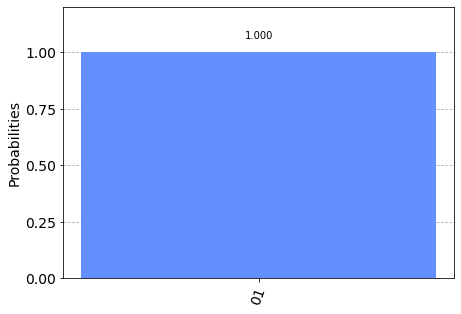

In [147]:
# Use Aer's qasm_simulator
backend_sim = qiskit.Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = qiskit.execute(circ, backend_sim, shots=1, backend_options=backend_ops, noise_model=noise)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

{'00': 1, '01': 3, '10': 6}


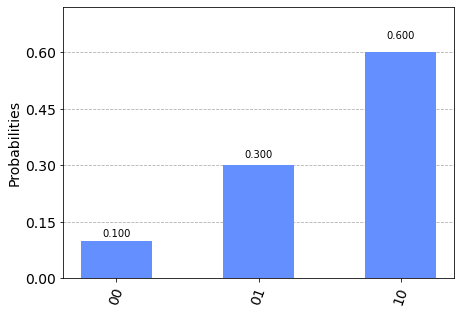

In [125]:
# Use Aer's qasm_simulator
backend_sim = qiskit.Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = qiskit.execute(circ, backend_sim, shots=10)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

{'01': 40, '10': 59, '11': 1}


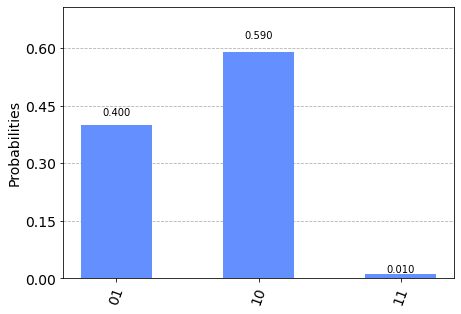

In [126]:
# Use Aer's qasm_simulator
backend_sim = qiskit.Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = qiskit.execute(circ, backend_sim, shots=100)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

{'00': 4, '01': 497, '10': 495, '11': 4}


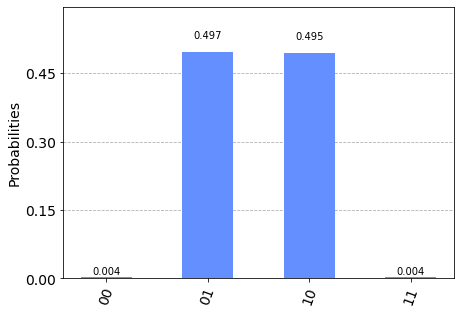

In [127]:
# Use Aer's qasm_simulator
backend_sim = qiskit.Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = qiskit.execute(circ, backend_sim, shots=1000)

# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [39]:
steps = 200
init_params = np.array([3.0, 1.0])

In [41]:
#@qml.qnode(dev)
def cost(x):
    return (circuit(x)-(-1.00))**2